Problem1- Perform a classification task with knn from scratch.


In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Copy of diabetes.csv')

print("First few rows of the dataset:")
display(data.head())

print("\nData types:")
display(data.dtypes.to_frame(name="Data Type"))

print("\nSummary Statistics:")
display(data.describe())

print("\nMissing Values Count:")
display(data.isnull().sum().to_frame(name="Missing Values"))

missing_values = data.isnull().sum() / len(data) * 100
print("\nPercentage of Missing Values in Each Column:")
display(missing_values.to_frame(name="Missing Values (%)"))

for column in data.columns:
    if missing_values[column] > 10:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data.dropna(subset=[column], inplace=True)

print("\nMissing Values After Processing:")
display(data.isnull().sum().to_frame(name="Missing Values"))

X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

print("\nShape of Training and Testing Data:")
shape_data = {
    "X_train": X_train.shape,
    "X_test": X_test.shape,
    "y_train": y_train.shape,
    "y_test": y_test.shape
}
display(pd.DataFrame(list(shape_data.items()), columns=["Dataset", "Shape"]))

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)



First few rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Data types:


,Data Type
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64



Summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Missing Values Count:


,Missing Values
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0



Percentage of Missing Values in Each Column:


,Missing Values (%)
Pregnancies,0.0
Glucose,0.0
BloodPressure,0.0
SkinThickness,0.0
Insulin,0.0
BMI,0.0
DiabetesPedigreeFunction,0.0
Age,0.0
Outcome,0.0



Missing Values After Processing:


,Missing Values
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0



Shape of Training and Testing Data:


,Dataset,Shape
0,X_train,"(538, 8)"
1,X_test,"(230, 8)"
2,y_train,"(538,)"
3,y_test,"(230,)"


Problem - 2 - Experimentation:

In [4]:
def compute_accuracy(y_true, y_pred):
    """Compute the accuracy of predictions."""
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

predictions = knn_predict(X_test, X_train, y_train, k=3)

accuracy = compute_accuracy(y_test, predictions)
print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")


Accuracy of the KNN model on the test set: 67.39%


Problem - 3 - Experimentation with k:

Accuracy for k=1: 68.70%
Accuracy for k=2: 72.61%
Accuracy for k=3: 67.39%
Accuracy for k=4: 72.17%
Accuracy for k=5: 68.70%
Accuracy for k=6: 70.00%
Accuracy for k=7: 69.13%
Accuracy for k=8: 71.30%
Accuracy for k=9: 70.00%
Accuracy for k=10: 71.74%
Accuracy for k=11: 73.04%
Accuracy for k=12: 73.91%
Accuracy for k=13: 74.35%
Accuracy for k=14: 72.61%
Accuracy for k=15: 73.91%
Accuracy for k=16: 73.48%
Accuracy for k=17: 72.61%
Accuracy for k=18: 71.30%
Accuracy for k=19: 72.17%
Accuracy for k=20: 70.87%


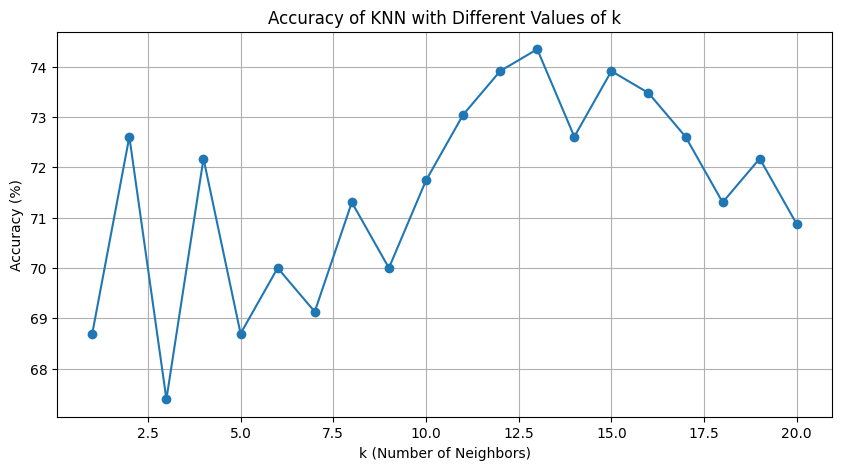

{1: 68.69565217391305,
 2: 72.60869565217392,
 3: 67.3913043478261,
 4: 72.17391304347827,
 5: 68.69565217391305,
 6: 70.0,
 7: 69.1304347826087,
 8: 71.30434782608695,
 9: 70.0,
 10: 71.73913043478261,
 11: 73.04347826086956,
 12: 73.91304347826086,
 13: 74.34782608695653,
 14: 72.60869565217392,
 15: 73.91304347826086,
 16: 73.47826086956522,
 17: 72.60869565217392,
 18: 71.30434782608695,
 19: 72.17391304347827,
 20: 70.86956521739131}

In [5]:
import matplotlib.pyplot as plt

def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """Run KNN predictions for different values of k and plot the accuracies."""
    accuracies = {}
    for k in k_values:
        predictions = knn_predict(X_test, X_train, y_train, k=k)
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        print(f"Accuracy for k={k}: {accuracy:.2f}%")

    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show()

    return accuracies

k_values = range(1, 21)

experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
